# Incidence of Chicken Pox in France

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

The data on the incidence of Chicen Pox are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, in which each line corresponds to a week in the observation period. Only the complete dataset, starting in 1991 and ending with a recent week, is available for download.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

We made a copy of the data in the url and run this code with these data (14 of november of 2024)

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `week`       | ISO8601 Yearweek number as numeric (year times 100 + week nubmer)                                                               |
| `indicator`  | Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json                               |
| `inc`        | Estimated incidence value for the time step, in the geographic level                                                      |
| `inc_low`    | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc_up`     | Upper bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100`     | Estimated rate incidence per 100,000 inhabitants                                                                          |
| `inc100_low` | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100_up`  | Upper bound of the estimated rate incidence 95% Confidence Interval                                                       |
| `geo_insee`  | Identifier of the geographic area, from INSEE https://www.insee.fr                                                        |
| `geo_name`   | Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading |

The first line of the CSV file is a comment, which we ignore with `skip=1`.

In [3]:
data_file = "inc-7-PAY.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202445          7   3899     1523    6275       6           2   
1     202444          7   2208      692    3724       3           1   
2     202443          7   2124      641    3607       3           1   
3     202442          7   2621     1246    3996       4           2   
4     202441          7   2035      381    3689       3           1   
5     202440          7   2125      725    3525       3           1   
6     202439          7   2898     1333    4463       4           2   
7     202438          7    751        0    1513       1           0   
8     202437          7    916       28    1804       1           0   
9     202436          7   2235      870    3600       3           1   
10    202435          7   1620      285    2955       2           0   
11    202434          7   2560      622    4498       4           1   
12    202433          7   1971      536    3406       3           1   
13    202432          7   4399     1944    6854       7           3   
14    202431          7   4500     2213    6787       7           4   
15    202430          7   7004     4278    9730      11           7   
16    202429          7   9270     6303   12237      14          10   
17    202428          7   9364     6498   12230      14          10   
18    202427          7  10247     7090   13404      15          10   
19    202426          7  14368    10399   18337      22          16   
20    202425          7  11174     8039   14309      17          12   
21    202424          7  12621     9357   15885      19          14   
22    202423          7  14657    11339   17975      22          17   
23    202422          7  11628     8361   14895      17          12   
24    202421          7   9701     6851   12551      15          11   
25    202420          7  13661    10209   17113      20          15   
26    202419          7  10083     6413   13753      15           9   
27    202418          7  13438     9514   17362      20          14   
28    202417          7  15303    11219   19387      23          17   
29    202416          7  18138    13540   22736      27          20   
...      ...        ...    ...      ...     ...     ...         ...   
1741  199126          7  17608    11304   23912      31          20   
1742  199125          7  16169    10700   21638      28          18   
1743  199124          7  16171    10071   22271      28          17   
1744  199123          7  11947     7671   16223      21          13   
1745  199122          7  15452     9953   20951      27          17   
1746  199121          7  14903     8975   20831      26          16   
1747  199120          7  19053    12742   25364      34          23   
1748  199119          7  16739    11246   22232      29          19   
1749  199118          7  21385    13882   28888      38          25   
1750  199117          7  13462     8877   18047      24          16   
1751  199116          7  14857    10068   19646      26          18   
1752  199115          7  13975     9781   18169      25          18   
1753  199114          7  12265     7684   16846      22          14   
1754  199113          7   9567     6041   13093      17          11   
1755  199112          7  10864     7331   14397      19          13   
1756  199111          7  15574    11184   19964      27          19   
1757  199110          7  16643    11372   21914      29          20   
1758  199109          7  13741     8780   18702      24          15   
1759  199108          7  13289     8813   17765      23          15   
1760  199107          7  12337     8077   16597      22          15   
1761  199106          7  10877     7013   14741      19          12   
1762  199105          7  10442     6544   14340      18          11   
1763  199104          7   7913     4563   11263      14           8   
1764  199103          7  15387    10484   20290      27          18   
1765  199102          7  16277  

Are there missing data points? 

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

There is no missing points

In [5]:
data = raw_data.copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202445          7   3899     1523    6275       6           2   
1     202444          7   2208      692    3724       3           1   
2     202443          7   2124      641    3607       3           1   
3     202442          7   2621     1246    3996       4           2   
4     202441          7   2035      381    3689       3           1   
5     202440          7   2125      725    3525       3           1   
6     202439          7   2898     1333    4463       4           2   
7     202438          7    751        0    1513       1           0   
8     202437          7    916       28    1804       1           0   
9     202436          7   2235      870    3600       3           1   
10    202435          7   1620      285    2955       2           0   
11    202434          7   2560      622    4498       4           1   
12    202433          7   1971      536    3406       3           1   
13    202432          7   4399     1944    6854       7           3   
14    202431          7   4500     2213    6787       7           4   
15    202430          7   7004     4278    9730      11           7   
16    202429          7   9270     6303   12237      14          10   
17    202428          7   9364     6498   12230      14          10   
18    202427          7  10247     7090   13404      15          10   
19    202426          7  14368    10399   18337      22          16   
20    202425          7  11174     8039   14309      17          12   
21    202424          7  12621     9357   15885      19          14   
22    202423          7  14657    11339   17975      22          17   
23    202422          7  11628     8361   14895      17          12   
24    202421          7   9701     6851   12551      15          11   
25    202420          7  13661    10209   17113      20          15   
26    202419          7  10083     6413   13753      15           9   
27    202418          7  13438     9514   17362      20          14   
28    202417          7  15303    11219   19387      23          17   
29    202416          7  18138    13540   22736      27          20   
...      ...        ...    ...      ...     ...     ...         ...   
1741  199126          7  17608    11304   23912      31          20   
1742  199125          7  16169    10700   21638      28          18   
1743  199124          7  16171    10071   22271      28          17   
1744  199123          7  11947     7671   16223      21          13   
1745  199122          7  15452     9953   20951      27          17   
1746  199121          7  14903     8975   20831      26          16   
1747  199120          7  19053    12742   25364      34          23   
1748  199119          7  16739    11246   22232      29          19   
1749  199118          7  21385    13882   28888      38          25   
1750  199117          7  13462     8877   18047      24          16   
1751  199116          7  14857    10068   19646      26          18   
1752  199115          7  13975     9781   18169      25          18   
1753  199114          7  12265     7684   16846      22          14   
1754  199113          7   9567     6041   13093      17          11   
1755  199112          7  10864     7331   14397      19          13   
1756  199111          7  15574    11184   19964      27          19   
1757  199110          7  16643    11372   21914      29          20   
1758  199109          7  13741     8780   18702      24          15   
1759  199108          7  13289     8813   17765      23          15   
1760  199107          7  12337     8077   16597      22          15   
1761  199106          7  10877     7013   14741      19          12   
1762  199105          7  10442     6544   14340      18          11   
1763  199104          7   7913     4563   11263      14           8   
1764  199103          7  15387    10484   20290      27          18   
1765  199102          7  16277  

Our dataset uses an uncommon encoding; the week number is attached
to the year number, leaving the impression of a six-digit integer.
That is how Pandas interprets it.

A second problem is that Pandas does not know about week numbers.
It needs to be given the dates of the beginning and end of the week.
We use the library `isoweek` for that.

Since the conversion is a bit lengthy, we write a small Python 
function for doing it. Then we apply it to all points in our dataset. 
The results go into a new column 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

There are two more small changes to make.

First, we define the observation periods as the new index of
our dataset. That turns it into a time series, which will be
convenient later on.

Second, we sort the points chronologically.

In [7]:
sorted_data = data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2024-04-15/2024-04-21  202416          7  18138    13540   22736      27   
2024-04-22/2024-04-28  202417          7  15303    11219   19387      23   
2024-04-29/2024-05-05  202418          7  13438     9514   17362      20   
2024-05-06/2024-05-12  202419          7  10083     6413   13753      15   
2024-05-13/2024-05-19  202420          7  13661    10209   17113      20   
2024-05-20/2024-05-26  202421          7   9701     6851   12551      15   
2024-05-27/2024-06-02  202422          7  11628     8361   14895      17   
2024-06-03/2024-06-09  202423          7  14657    11339   17975      22   
2024-06-10/2024-06-16  202424          7  12621     9357   15885      19   
2024-06-17/2024-06-23  202425          7  11174     8039   14309      17   
2024-06-24/2024-06-30  202426          7  14368    10399   18337      22   
2024-07-01/2024-07-07  202427          7  10247     7090   13404      15   
2024-07-08/2024-07-14  202428          7   9364     6498   12230      14   
2024-07-15/2024-07-21  202429          7   9270     6303   12237      14   
2024-07-22/2024-07-28  202430          7   7004     4278    9730      11   
2024-07-29/2024-08-04  202431          7   4500     2213    6787       7   
2024-08-05/2024-08-11  202432          7   4399     1944    6854       7   
2024-08-12/2024-08-18  202433          7   1971      536    3406       3   
2024-08-19/2024-08-25  202434          7   2560      622    4498       4   
2024-08-26/2024-09-01  202435          7   1620      285    2955       2 

We check the consistency of the data. Between the end of a period and the beginning of the next one, the difference should be zero, or very small. We tolerate an error of one second.

This is OK except for one pair of consecutive periods between which a whole week is missing.

We recognize the dates: it's the week without observations that we have deleted earlier!

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

A first look at the data!

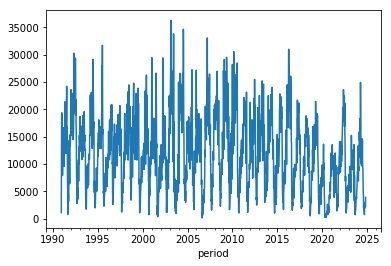

In [9]:
sorted_data['inc'].plot()

A zoom on the last few years shows more clearly that the peaks are situated in winter.

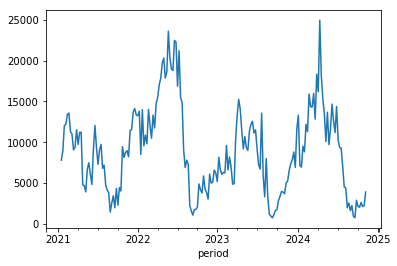

In [10]:
sorted_data['inc'][-200:].plot()

# Study of the annual incidence

Since the peaks of the epidemic happen in winter, near the transition between calendar years, we define the reference period for the annual incidence from August 1st of year  𝑁
  to August 1st of year  𝑁+1
 . We label this period as year  𝑁+1
  because the peak is always located in year  𝑁+1
 . The very low incidence in summer ensures that the arbitrariness of the choice of reference period has no impact on our conclusions.

Our task is a bit complicated by the fact that a year does not have an integer number of weeks. Therefore we modify our reference period a bit: instead of August 1st, we use the first day of the week containing August 1st.

A final detail: the dataset starts in October 1984, the first peak is thus incomplete, We start the analysis with the first full peak.

In [16]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

Starting from this list of weeks that contain August 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods.

We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [17]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

And here are the annual incidences.

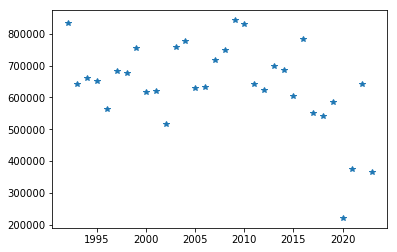

In [18]:
yearly_incidence.plot(style='*')

A sorted list makes it easier to find the highest values (at the end).

In [19]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Finally, a histogram clearly shows the few very strong epidemics, which affect about 10% of the French population,
but are rare: there were three of them in the course of 35 years. The typical epidemic affects only half as many people.

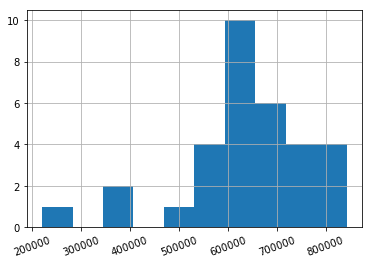

In [20]:
yearly_incidence.hist(xrot=20)